In [20]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import patsy

In [21]:
cwd = pathlib.Path.cwd()
data_path = cwd / 'data'
pkl_path = data_path / 'pkl'
observations_pkl = pkl_path /'observations.pkl'
df = pd.read_pickle(observations_pkl).astype(float)

## 36.7% r2/adj with multicollinearity  / 19464 rmse
## 31.2% r2/adj witout /// 20293 rmse

my tailor without logging median income for 100% is 19598

In [51]:
X = df.drop(columns=['Median_Income'])
y = df['Median_Income']

# columns = ('Type_Id Students_with_Scores Percentage_Standard_Met_and_Above Mean_Scale_Score Students_Tested ' +
#             'CAASPP_Reported_Enrollment Test_Id Grade Total_Tested_with_Scores Total_Tested_At_Entity_Level ' +
#             'Test_Year').split()
# X = df[columns]

lm = sm.OLS(y, sm.add_constant(X))
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Median_Income   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     1223.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:35:56   Log-Likelihood:            -6.4302e+05
No. Observations:               56928   AIC:                         1.286e+06
Df Residuals:                   56900   BIC:                         1.286e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Test_Year                          1147.0075   2666.573      0.430      0.667   -4079.491    6373.506
Total_Tested_At_Entity_Level        189.8140     51.271      3.702      0.000      89.323     290.305
Total_Tested_with_Scores           -189.6706     51.342     -3.694      0.000    -290.301     -89.040
Grade                              -639.4390    112.092     -5.705      0.000    -859.140    -419.738
Test_Id                            1.542e+05   2.35e+06      0.066      0.948   -4.46e+06    4.77e+06
CAASPP_Reported_Enrollment          170.7343     12.565     13.588      0.000     146.106     195.362
Students_Tested                    -225.0155    142.225     -1.582      0.114    -503.777      53.746
Mean_Scale_Score                     31.5475      4.753      6.638      0.000      22.232      40.863
Percentage_Standard_Exceeded      -8.607e+05   1.79e+06     -0.480      0.631   -4.37e+06    2.65e+06
Percentage_Standard_Met            -8.95e+05   1.79e+06     -0.499      0.618   -4.41e+06    2.62e+06
Percentage_Standard_Met_and_Above -2.684e+06   2.09e+06     -1.283      0.199   -6.79e+06    1.42e+06
Percentage_Standard_Nearly_Met    -3.572e+06   1.75e+06     -2.036      0.042   -7.01e+06   -1.33e+05
Percentage_Standard_Not_Met       -3.564e+06   1.75e+06     -2.031      0.042      -7e+06   -1.25e+05
Students_with_Scores                 63.8643    140.998      0.453      0.651    -212.493     340.221
Area_1_Percentage_Above_Standard  -1.657e+06   1.66e+06     -0.999      0.318   -4.91e+06    1.59e+06
Area_1_Percentage_Near_Standard   -1.674e+06   1.66e+06     -1.009      0.313   -4.92e+06    1.58e+06
Area_1_Percentage_Below_Standard  -1.669e+06   1.66e+06     -1.007      0.314   -4.92e+06    1.58e+06
Area_2_Percentage_Above_Standard   1.899e+06   1.67e+06      1.140      0.254   -1.37e+06    5.16e+06
Area_2_Percentage_Near_Standard    1.866e+06   1.67e+06      1.120      0.263    -1.4e+06    5.13e+06
Area_2_Percentage_Below_Standard   1.861e+06   1.67e+06      1.117      0.264    -1.4e+06    5.12e+06
Area_3_Percentage_Above_Standard   6.417e+05   1.68e+06      0.382      0.703   -2.65e+06    3.94e+06
Area_3_Percentage_Near_Standard    6.275e+05   1.68e+06      0.373      0.709   -2.67e+06    3.92e+06
Area_3_Percentage_Below_Standard   6.269e+05   1.68e+06      0.373      0.709   -2.67e+06    3.92e+06
Area_4_Percentage_Above_Standard   1.512e+05   2.35e+06      0.064      0.949   -4.46e+06    4.76e+06
Area_4_Percentage_Near_Standard    1.566e+05   2.35e+06      0.067      0.947   -4.46e+06    4.77e+06
Area_4_Percentage_Below_Standard   1.503e+05   2.35e+06      0.064      0.949   -4.46e+06    4.76e+06
Type_Id                           -1928.8243    104.749    -18.414      0.000   -2134.134   -1723.515
Zip                    

In [52]:
# X = df.drop(columns=['Median_Income'])
# y = np.log(df['Median_Income'])
y = df['Median_Income']

# raw = 'Type_Id Students_with_Scores Students_Tested CAASPP_Reported_Enrollment Total_Tested_with_Scores Total_Tested_At_Entity_Level '

# y, X = patsy.dmatrices('np.log(Median_Income) ~ Test_Id + (Grade) + Mean_Scale_Score + 0'
#                        + '+' + ' + '.join(raw.split())
#                        , data=df)


linreg = LinearRegression()
fit = linreg.fit(X, y)
r_squared = linreg.score(X, y)
adjusted_r_squared = 1 - (1 - r_squared) * len(y) / (len(y) - X.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y, fit.predict(X)))

print('Intercept:', fit.intercept_)
print('R^2 Score:', r_squared)
print('Adj R^2 Score:', adjusted_r_squared)
print('RMSE Score:', rmse)

Intercept: 2314660.2969967425
R^2 Score: 0.36726973440837973
Adj R^2 Score: 0.3669472475860779
RMSE Score: 19464.37825010307


Text(0, 0.5, 'Residuals')

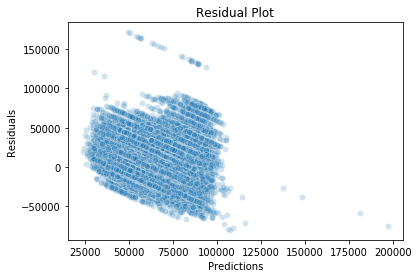

In [37]:
import matplotlib.pyplot as plt

predictions = fit.predict(X)
residuals = y - fit.predict(X)
plot = sns.scatterplot(x=predictions.ravel(), y=residuals.ravel(), alpha=0.2)
plt.title('Residual Plot')
plt.xlabel('Predictions')
plt.ylabel('Residuals')